In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster
import datetime

from pandas.plotting import autocorrelation_plot
# from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

sns.set(rc = {'figure.figsize': (15,8)})

In [2]:
model_data = pd.read_csv('../data/curated/model-data/model-data.csv')
model_data

,postcode,latitude,longitude,bedrooms,bathrooms,property_type,price,postcode_property_count,public-service-duration,care-facility-duration,...,pri-1-10,pri-11-50,pri-51-100,pri-101-150,pri-150+,sec-1-10,sec-11-50,sec-51-100,sec-101-150,sec-150+
0,3029,-37.836800,144.681992,3,2,House,410.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
1,3029,-37.858776,144.670990,4,2,House,420.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
2,3029,-37.831726,144.721200,4,2,New House & Land,440.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
3,3029,-37.850758,144.712234,3,3,House,415.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
4,3029,-37.843980,144.717514,3,2,House,410.0,264,3.611667,3.186500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12122,3934,-38.248100,145.041611,3,2,Townhouse,625.0,13,14.985667,0.896667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12123,3934,-38.285440,144.995331,4,2,House,720.0,13,14.985667,0.896667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12124,3934,-38.250070,145.052078,4,2,House,700.0,13,14.985667,0.896667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12125,3934,-38.290226,145.016418,3,2,House,870.0,13,14.985667,0.896667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [3]:
model_data.columns

Index(['postcode', 'latitude', 'longitude', 'bedrooms', 'bathrooms',
       'property_type', 'price', 'postcode_property_count',
       'public-service-duration', 'care-facility-duration',
       'shopping-center-duration', 'train-station-duration',
       'hospital-duration', 'CBD-duration', 'emergency-service-duration',
       'property-count', 'elector-count', 'crime-rate', 'income', 'pri-1-10',
       'pri-11-50', 'pri-51-100', 'pri-101-150', 'pri-150+', 'sec-1-10',
       'sec-11-50', 'sec-51-100', 'sec-101-150', 'sec-150+'],
      dtype='object')

In [4]:
model_data.insert(0, 'date', datetime.date.today())

In [5]:
f = Forecaster(y = model_data['price'], current_dates = model_data['date'])
f

Forecaster(
    DateStartActuals=2022-09-28T00:00:00.000000000
    DateEndActuals=2022-09-28T00:00:00.000000000
    Freq=None
    N_actuals=12127
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

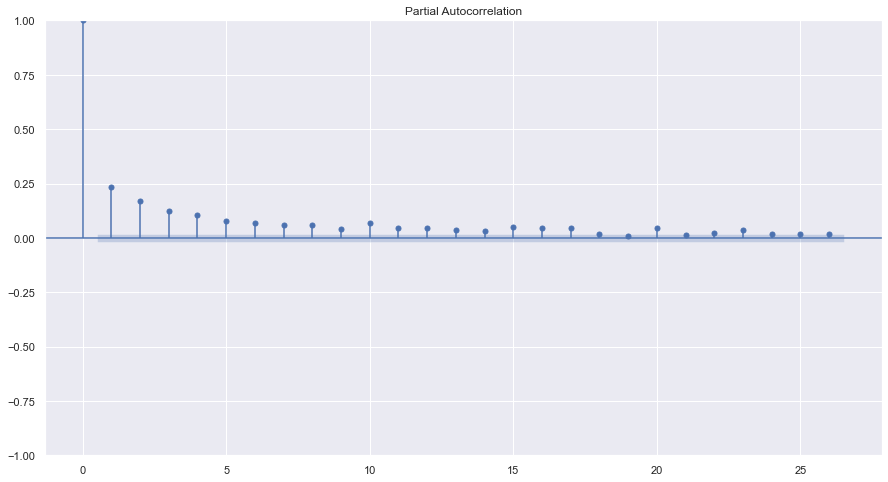

In [6]:
f.plot_pacf(lags=26)
plt.show()

In [7]:
f.seasonal_decompose().plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [8]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)

In [9]:
stat

-11.011673804214869

In [11]:
pval

6.302534912688659e-20

In [13]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

2022-09-28 22:21:52.381390: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-28 22:22:15.642918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


379/379 [==============================] - 1s 2ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

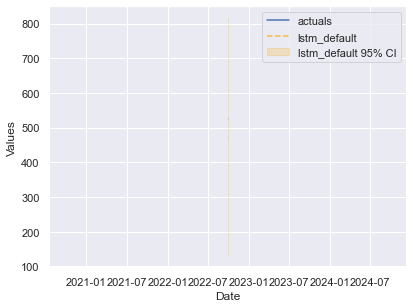

In [14]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

378/378 [==============================] - 1s 2ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

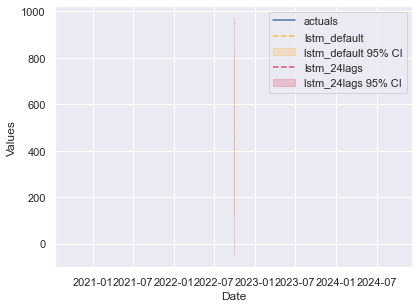

In [15]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
302/302 [==============================] - 4s 8ms/step - loss: 0.0409 - val_loss: 0.0397
Epoch 2/5
302/302 [==============================] - 3s 9ms/step - loss: 0.0364 - val_loss: 0.0397
Epoch 3/5
302/302 [==============================] - 3s 9ms/step - loss: 0.0363 - val_loss: 0.0394
Epoch 4/5
302/302 [==============================] - 3s 11ms/step - loss: 0.0363 - val_loss: 0.0396
Epoch 5/5
1/1 [==============================] - 0s 403ms/step
Epoch 1/5
303/303 [==============================] - 5s 9ms/step - loss: 0.0428 - val_loss: 0.0396
Epoch 2/5
303/303 [==============================] - 2s 7ms/step - loss: 0.0364 - val_loss: 0.0398
Epoch 3/5
303/303 [==============================] - 2s 7ms/step - loss: 0.0364 - val_loss: 0.0394
Epoch 4/5
303/303 [==============================] - 2s 7ms/step - loss: 0.0363 - val_loss: 0.0393
Epoch 5/5
378/378 [==============================] - 1s 2ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

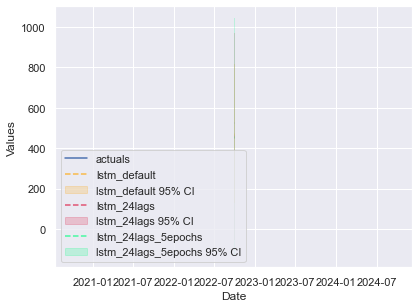

In [16]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/25
302/302 [==============================] - 14s 25ms/step - loss: 0.0407 - val_loss: 0.0404
Epoch 2/25
302/302 [==============================] - 9s 28ms/step - loss: 0.0366 - val_loss: 0.0398
Epoch 3/25
302/302 [==============================] - 7s 25ms/step - loss: 0.0365 - val_loss: 0.0402
Epoch 4/25
302/302 [==============================] - 6s 21ms/step - loss: 0.0365 - val_loss: 0.0393
Epoch 5/25
302/302 [==============================] - 6s 21ms/step - loss: 0.0364 - val_loss: 0.0393
Epoch 6/25
302/302 [==============================] - 6s 19ms/step - loss: 0.0363 - val_loss: 0.0395
Epoch 7/25
302/302 [==============================] - 6s 21ms/step - loss: 0.0364 - val_loss: 0.0393
Epoch 8/25
302/302 [==============================] - 7s 24ms/step - loss: 0.0363 - val_loss: 0.0393
Epoch 9/25
302/302 [==============================] - 6s 20ms/step - loss: 0.0363 - val_loss: 0.0392
Epoch 10/25
302/302 [==============================] - 6s 19ms/step - loss: 0.0362 - val_l

<AxesSubplot:xlabel='Date', ylabel='Values'>

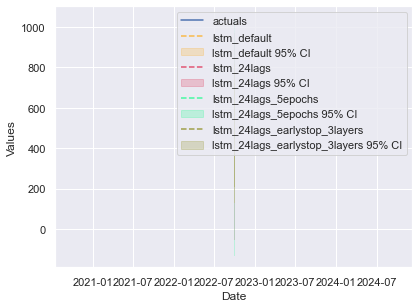

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

Epoch 1/15
302/302 [==============================] - 28s 73ms/step - loss: 0.0384 - val_loss: 0.0398
Epoch 2/15
302/302 [==============================] - 20s 66ms/step - loss: 0.0367 - val_loss: 0.0397
Epoch 3/15
302/302 [==============================] - 25s 82ms/step - loss: 0.0366 - val_loss: 0.0397
Epoch 4/15
302/302 [==============================] - 27s 89ms/step - loss: 0.0366 - val_loss: 0.0394
Epoch 5/15
302/302 [==============================] - 26s 87ms/step - loss: 0.0364 - val_loss: 0.0399
Epoch 6/15
302/302 [==============================] - 27s 91ms/step - loss: 0.0364 - val_loss: 0.0405
Epoch 7/15
302/302 [==============================] - 19s 63ms/step - loss: 0.0364 - val_loss: 0.0396
Epoch 8/15
302/302 [==============================] - 19s 64ms/step - loss: 0.0363 - val_loss: 0.0393
Epoch 9/15
302/302 [==============================] - 24s 79ms/step - loss: 0.0362 - val_loss: 0.0401
Epoch 10/15
302/302 [==============================] - 23s 75ms/step - loss: 0.036

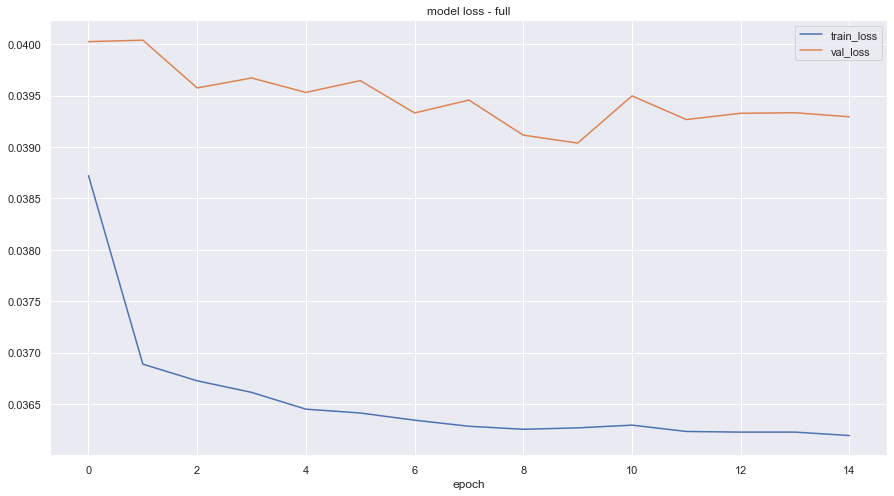

378/378 [==============================] - 8s 21ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

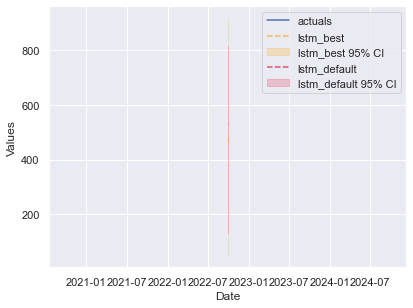

In [18]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [19]:
f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data

<AxesSubplot:xlabel='Date', ylabel='Values'>

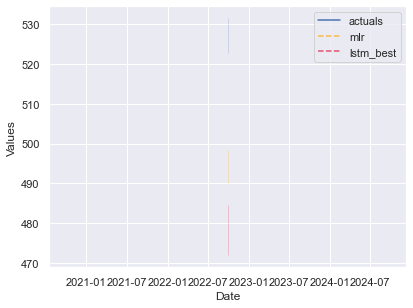

In [20]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

<AxesSubplot:xlabel='Date', ylabel='Values'>

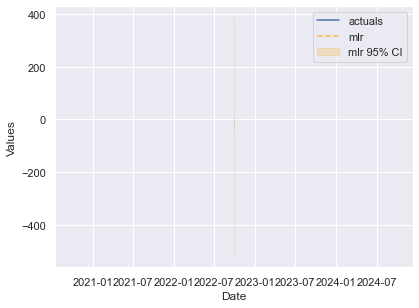

In [21]:
f.plot_test_set(models='mlr',ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

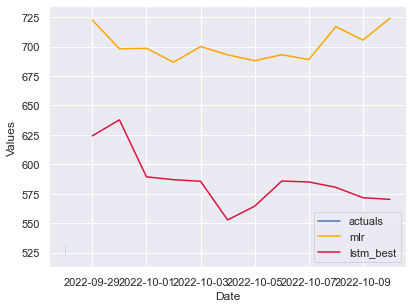

In [22]:
f.plot(models=['mlr','lstm_best'],
       order_by='LevelTestSetMAPE',
       level=True)

In [23]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,mlr,0.378066,348.069077,-2.021105,True
1,lstm_best,0.391851,362.551999,-2.277748,False
2,lstm_default,0.402165,368.011348,-2.377205,False
3,lstm_24lags,0.409990,379.543137,-2.592173,False
4,lstm_24lags_earlystop_3layers,0.414276,373.676302,-2.481978,False
5,lstm_24lags_5epochs,0.416096,380.521374,-2.610714,False


In [24]:
model_data

,date,postcode,latitude,longitude,bedrooms,bathrooms,property_type,price,postcode_property_count,public-service-duration,...,pri-1-10,pri-11-50,pri-51-100,pri-101-150,pri-150+,sec-1-10,sec-11-50,sec-51-100,sec-101-150,sec-150+
0,2022-09-28,3029,-37.836800,144.681992,3,2,House,410.0,264,3.611667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
1,2022-09-28,3029,-37.858776,144.670990,4,2,House,420.0,264,3.611667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
2,2022-09-28,3029,-37.831726,144.721200,4,2,New House & Land,440.0,264,3.611667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
3,2022-09-28,3029,-37.850758,144.712234,3,3,House,415.0,264,3.611667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
4,2022-09-28,3029,-37.843980,144.717514,3,2,House,410.0,264,3.611667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12122,2022-09-28,3934,-38.248100,145.041611,3,2,Townhouse,625.0,13,14.985667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12123,2022-09-28,3934,-38.285440,144.995331,4,2,House,720.0,13,14.985667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12124,2022-09-28,3934,-38.250070,145.052078,4,2,House,700.0,13,14.985667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12125,2022-09-28,3934,-38.290226,145.016418,3,2,House,870.0,13,14.985667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [5]:
list_of_prediction = []

In [26]:
for i in range (0, 5):
    data2 = model_data.loc[i].T
    data2 = data2[0]
    data2 = data2.astype(float)
    model = pm.auto_arima(data2, 
                          start_p = 1,
                          start_1 = 1, 
                          test='adf',       
                          max_p=5,
                          max_q=5, 
                          m=2,              
                          d=None,           
                          seasonal=False, 
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
    n_period = 1
    fc, confint = model.predict(n_periods=n_period, return_conf_int=True)
    fc = fc.tolist()
    list_of_prediction.append(fc)

AttributeError: 'str' object has no attribute 'astype'

In [29]:
data2 = model_data.loc[0].T
data2 = data2[0]

In [30]:
from pmdarima.arima.utils          import ndiffs
from sklearn.metrics               import mean_squared_error
from pandas.plotting               import autocorrelation_plot
from statsmodels.tsa.stattools     import adfuller
from statsmodels.tsa.arima.model   import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [33]:
# fit model
model = ARIMA(model_data, order=(5,1,0))
model_fit = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).